Домашнее задание 
===

Данные
----
Данные содержат информацию о продажах автомобилей в месяц. 

Задание
--
* Построить модель предсказаний, используя библиотеку Propeht. 
* Сделать предсказание на год вперед (12 месяцев)
* При постоении модели использовать кросс-валидацию

In [23]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../datatest/monthly-car-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.rename(columns = {'Month': 'ds',
                     'Sales': 'y'},
          inplace=True)
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


1. prophet model

In [12]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9600.274043,4508.096015,7672.963646,9600.274043,9600.274043,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,0.0,0.0,0.0,6135.958515
1,1960-02-01,9704.265356,5166.858833,8360.495624,9704.265356,9704.265356,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,0.0,0.0,0.0,6751.813273
2,1960-03-01,9801.547552,11003.793053,14403.467205,9801.547552,9801.547552,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,0.0,0.0,0.0,12744.669521
3,1960-04-01,9905.538865,13173.175780,16509.914324,9905.538865,9905.538865,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,0.0,0.0,0.0,14817.444842
4,1960-05-01,10006.175619,14602.823753,17685.924212,10006.175619,10006.175619,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,0.0,0.0,0.0,16164.229808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1969-07-31,18840.383801,13254.683904,16407.707676,18821.702576,18856.328059,-3921.967027,-3921.967027,-3921.967027,-3921.967027,-3921.967027,-3921.967027,0.0,0.0,0.0,14918.416774
116,1969-08-31,18895.809811,12140.589072,15348.073526,18874.116119,18914.747712,-5122.863866,-5122.863866,-5122.863866,-5122.863866,-5122.863866,-5122.863866,0.0,0.0,0.0,13772.945945
117,1969-09-30,18949.447885,16753.126961,19762.529708,18923.245266,18971.322158,-606.630637,-606.630637,-606.630637,-606.630637,-606.630637,-606.630637,0.0,0.0,0.0,18342.817248
118,1969-10-31,19004.873895,18987.485676,22203.938284,18974.741500,19031.504564,1638.996278,1638.996278,1638.996278,1638.996278,1638.996278,1638.996278,0.0,0.0,0.0,20643.870173


<ipython-input-18-d929e4e8c99a>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
<ipython-input-18-d929e4e8c99a>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


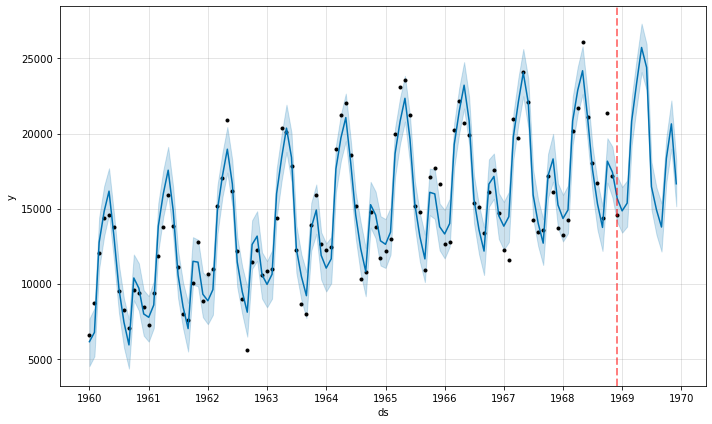

In [18]:
fig = m.plot(forecast)
ax = fig.add_subplot(111)
ax.axvline(x=forecast['ds'].max() - pd.Timedelta('365 days'), c='red', lw=2, alpha=0.5, ls='--')
fig.show()

In [21]:
df_cv = cross_validation(m, horizon='365 days')
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[0]]

INFO:fbprophet:Making 10 forecasts with cutoffs between 1963-06-03 12:00:00 and 1967-12-02 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

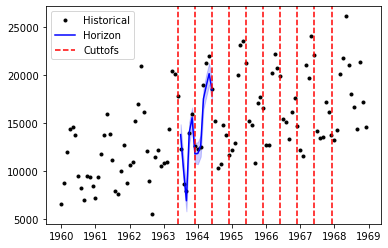

In [24]:
fig, ax = plt.subplots()

ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
                df_cv1['yhat_lower'],
                df_cv1['yhat_upper'],
                color = 'blue',
                alpha = 0.2)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
                'c': 'red',
                'ls':'--'
                }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

In [25]:

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,59 days 12:00:00,3.153639e+06,1775.848785,1600.093551,0.130422,0.119738,0.416667
1,60 days 00:00:00,2.961228e+06,1720.821953,1500.092567,0.123813,0.119738,0.458333
2,61 days 00:00:00,4.818892e+06,2195.197400,1844.578107,0.153510,0.137597,0.375000
3,89 days 00:00:00,4.145742e+06,2036.109597,1658.881671,0.121811,0.077652,0.458333
4,89 days 12:00:00,3.980678e+06,1995.163673,1614.966264,0.122091,0.102938,0.500000
